<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/01-Mi-segundo-modelo-Plantilla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Escuela de Ciencias Físicas y Matemática</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Mi primer modelo
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Nombre y Apellido &bull; Fecha
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

Este notebook está diseñado parcticar en el entrenamiento y evaluación de un modelo de regresión lineal utilizando datos reales. Los objetivos principales son:

- Entrenar un modelo de regresión lineal.
- Evaluar el ajuste del modelo.


Del conjunto de datos disponible [aquí](https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv), se desea predecir la variable `price` en función de las variables `bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`.

**Librerías necesarias**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, KBinsDiscretizer, MaxAbsScaler, MinMaxScaler, RobustScaler, Normalizer, QuantileTransformer, PowerTransformer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score




---
## <font color='264CC7'> Lectura de Datos </font>


Realiza la lectura de los datos y presenta las primeras filas del conjunto de datos.

In [2]:
# Cargar el conjunto de datos
url = 'https://raw.githubusercontent.com/mGalarnyk/Tutorial_Data/master/King_County/kingCountyHouseData.csv'
df = pd.read_csv(url)
# Seleccionar las columnas de interés
columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','price']
df = df.loc[:, columns]
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,3,1.00,1180,5650,1.0,221900.0
1,3,2.25,2570,7242,2.0,538000.0
2,2,1.00,770,10000,1.0,180000.0
3,4,3.00,1960,5000,1.0,604000.0
4,3,2.00,1680,8080,1.0,510000.0
5,4,4.50,5420,101930,1.0,1225000.0
6,3,2.25,1715,6819,2.0,257500.0
7,3,1.50,1060,9711,1.0,291850.0
8,3,1.00,1780,7470,1.0,229500.0
9,3,2.50,1890,6560,2.0,323000.0


---
## <font color='264CC7'> Preprocesamiento de datos </font>

Realiza una normalización de los datos, prueba diferentes técnicas y selecciona la que mejor se ajuste a los datos.

**Normalización MaxAbsScaler**

In [3]:
scaler_max=MaxAbsScaler()
scaler_max.fit(df)


df_scaled_max=scaler_max.transform(df)
df_scaled_max = pd.DataFrame(df_scaled_max, columns=df.columns)
df_scaled_max

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,0.090909,0.12500,0.087149,0.003421,0.285714,0.028818
1,0.090909,0.28125,0.189808,0.004385,0.571429,0.069870
2,0.060606,0.12500,0.056869,0.006056,0.285714,0.023377
3,0.121212,0.37500,0.144756,0.003028,0.285714,0.078442
4,0.090909,0.25000,0.124077,0.004893,0.285714,0.066234
...,...,...,...,...,...,...
21608,0.090909,0.31250,0.112999,0.000685,0.857143,0.046753
21609,0.121212,0.31250,0.170606,0.003520,0.571429,0.051948
21610,0.060606,0.09375,0.075332,0.000818,0.571429,0.052221
21611,0.090909,0.31250,0.118168,0.001446,0.571429,0.051948


**Normalización MinMaxScaler**

In [10]:
scaler_min=MinMaxScaler()
scaler_min.fit(df)


df_scaled_min=scaler_min.transform(df)
df_scaled_min = pd.DataFrame(df_scaled_min, columns=df.columns)
df_scaled_min

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,0.090909,0.12500,0.067170,0.003108,0.0,0.019266
1,0.090909,0.28125,0.172075,0.004072,0.4,0.060721
2,0.060606,0.12500,0.036226,0.005743,0.0,0.013770
3,0.121212,0.37500,0.126038,0.002714,0.0,0.069377
4,0.090909,0.25000,0.104906,0.004579,0.0,0.057049
...,...,...,...,...,...,...
21608,0.090909,0.31250,0.093585,0.000370,0.8,0.037377
21609,0.121212,0.31250,0.152453,0.003206,0.4,0.042623
21610,0.060606,0.09375,0.055094,0.000503,0.4,0.042898
21611,0.090909,0.31250,0.098868,0.001132,0.4,0.042623


**Normalización RobustScaler**

In [5]:
scaler_robust=RobustScaler()
scaler_robust.fit(df)


df_scaled_robust=scaler_robust.transform(df)
df_scaled_robust = pd.DataFrame(df_scaled_robust, columns=df.columns)
df_scaled_robust

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,0.0,-1.666667,-0.650045,-0.348442,-0.5,-0.706083
1,0.0,0.000000,0.587711,-0.066572,0.5,0.272404
2,-1.0,-1.666667,-1.015138,0.421742,-0.5,-0.835784
3,1.0,1.000000,0.044524,-0.463527,-0.5,0.476706
4,0.0,-0.333333,-0.204809,0.081799,-0.5,0.185730
...,...,...,...,...,...,...
21608,0.0,0.333333,-0.338379,-1.148548,1.5,-0.278595
21609,1.0,0.333333,0.356189,-0.319582,0.5,-0.154775
21610,-1.0,-2.000000,-0.792520,-1.109773,0.5,-0.148271
21611,0.0,0.333333,-0.276046,-0.925992,0.5,-0.154775


**Normalización StandardScaler**

In [29]:
scaler_standard=StandardScaler()
scaler_standard.fit(df)

df_scaled_standard=scaler_standard.transform(df)
df_scaled_standard = pd.DataFrame(df_scaled_standard, columns=df.columns)
df_scaled_standard

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,-0.398737,-1.447464,-0.979835,-0.228321,-0.915427,-0.866717
1,-0.398737,0.175607,0.533634,-0.189885,0.936506,-0.005688
2,-1.473959,-1.447464,-1.426254,-0.123298,-0.915427,-0.980849
3,0.676485,1.149449,-0.130550,-0.244014,-0.915427,0.174090
4,-0.398737,-0.149007,-0.435422,-0.169653,-0.915427,-0.081958
...,...,...,...,...,...,...
21608,-0.398737,0.500221,-0.598746,-0.337424,2.788439,-0.490545
21609,0.676485,0.500221,0.250539,-0.224386,0.936506,-0.381588
21610,-1.473959,-1.772078,-1.154047,-0.332137,0.936506,-0.375865
21611,-0.398737,0.500221,-0.522528,-0.307076,0.936506,-0.381588


**Normalización Normalizer**

In [11]:
scaler_normalizer=Normalizer()
scaler_normalizer.fit(df)


df_scaled_normalizer=scaler_normalizer.transform(df)
df_scaled_normalizer = pd.DataFrame(df_scaled_normalizer, columns=df.columns)
df_scaled_normalizer

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,0.000014,0.000005,0.005316,0.025453,0.000005,0.999662
1,0.000006,0.000004,0.004776,0.013460,0.000004,0.999898
2,0.000011,0.000006,0.004271,0.055470,0.000006,0.998451
3,0.000007,0.000005,0.003245,0.008278,0.000002,0.999960
4,0.000006,0.000004,0.003294,0.015841,0.000002,0.999869
...,...,...,...,...,...,...
21608,0.000008,0.000007,0.004250,0.003142,0.000008,0.999986
21609,0.000010,0.000006,0.005774,0.014531,0.000005,0.999878
21610,0.000005,0.000002,0.002537,0.003357,0.000005,0.999991
21611,0.000007,0.000006,0.004000,0.005970,0.000005,0.999974


**Normalización QuantileTransformer**

In [12]:
scaler_quantile=QuantileTransformer()
scaler_quantile.fit(df)


df_scaled_quantile=scaler_quantile.transform(df)
df_scaled_quantile = pd.DataFrame(df_scaled_quantile, columns=df.columns)
df_scaled_quantile

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,0.366366,0.091592,0.134635,0.302803,0.000000,0.062012
1,0.366366,0.528028,0.757257,0.459426,0.769770,0.627628
2,0.073073,0.091592,0.017518,0.717217,0.000000,0.021021
3,0.755255,0.895896,0.525025,0.238739,0.000000,0.709209
4,0.366366,0.432432,0.387888,0.556203,0.000000,0.590090
...,...,...,...,...,...,...
21608,0.366366,0.701201,0.308809,0.017008,0.983984,0.331331
21609,0.755255,0.701201,0.669670,0.317833,0.769770,0.400400
21610,0.073073,0.002002,0.076577,0.034284,0.769770,0.405623
21611,0.366366,0.701201,0.344344,0.066171,0.769770,0.400400


**Normalización PowerTransformer**

In [13]:
scaler_power=PowerTransformer()
scaler_power.fit(df)


df_scaled_power=scaler_power.transform(df)
df_scaled_power = pd.DataFrame(df_scaled_power, columns=df.columns)
df_scaled_power

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,price
0,-0.352407,-1.571853,-1.121655,-0.331682,-0.975610,-1.487563
1,-0.352407,0.250882,0.706456,-0.032289,1.029432,0.341055
2,-1.605435,-1.571853,-2.107060,0.336051,-0.975610,-1.977885
3,0.722633,1.136536,0.065492,-0.484436,-0.975610,0.553191
4,-0.352407,-0.072697,-0.296964,0.095276,-0.975610,0.241116
...,...,...,...,...,...,...
21608,-0.352407,0.559169,-0.516100,-2.661036,1.876834,-0.441698
21609,0.722633,0.559169,0.453567,-0.296649,1.029432,-0.229249
21610,-1.605435,-2.018163,-1.459381,-2.368001,1.029432,-0.218821
21611,-0.352407,0.559169,-0.411354,-1.488860,1.029432,-0.229249


---
## <font color='264CC7'> Características y etiquetas </font>

Separa las características y las etiquetas y mostrar la dimensión de cada conjunto.

Se elige trabajar con la normalización **Normalizer**

In [14]:
# Dividir el conjunto de datos en características y etiquetas
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors']
X = df_scaled_normalizer.loc[:, features]
y = df_scaled_normalizer.loc[:, ['price']]

# Mostrar la dimensión de X (características) y y (etiquetas)
print("Dimensión de X (características):", X.shape)
print("Dimensión de y (etiquetas):", y.shape)

Dimensión de X (características): (21613, 5)
Dimensión de y (etiquetas): (21613, 1)


---
## <font color='264CC7'> Conjunto de entrenamiento y prueba </font>

Divide los datos en dos conjuntos: uno para entrenamiento y otro para prueba y visualiza la dimensión de cada conjunto. Usar `random_state` igual al últmo número de tu cédula.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

Revisa la distribución de las etiquetas en los conjuntos de entrenamiento y prueba.

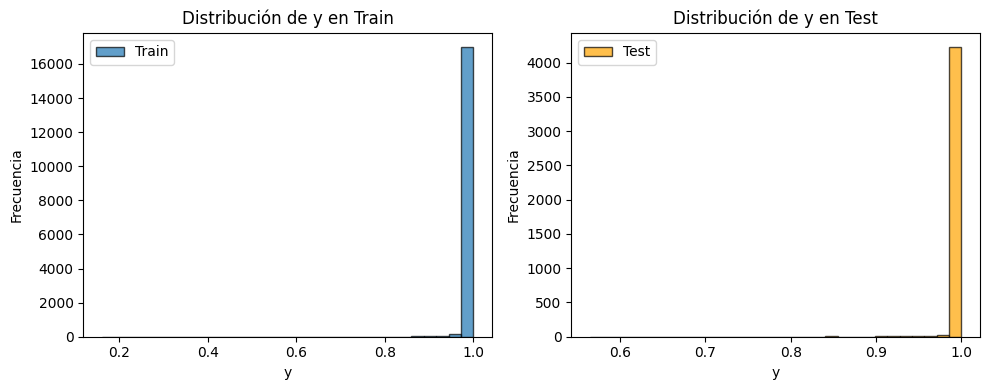

In [16]:
# Grafico la distribución de las clases en el conjunto de entrenamiento y prueba
plt.figure(figsize=(10, 4))

# Histograma para y_train
plt.subplot(1, 2, 1)
plt.hist(y_train, bins=30, alpha=0.7, edgecolor='black', label='Train')
plt.title('Distribución de y en Train')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

# Histograma para y_test
plt.subplot(1, 2, 2)
plt.hist(y_test, bins=30, alpha=0.7, edgecolor='black', label='Test', color='orange')
plt.title('Distribución de y en Test')
plt.xlabel('y')
plt.ylabel('Frecuencia')
plt.legend()

plt.tight_layout()
plt.show()

---
## <font color='264CC7'> Entrenamiento </font>

Define un modelo de regresión lineal y lo entrena con los datos de entrenamiento.

In [17]:
from sklearn.linear_model import LinearRegression
# Crear el modelo y ajustarlo
modelo = LinearRegression()
modelo.fit(X_train, y_train)
# Visualizar los coeficientes
print('Ecuación de la recta:')
print('y =', modelo.coef_[0][0], 'bedrooms +', modelo.coef_[0][1], 'bathrooms +', modelo.coef_[0][2], 'sqft_living +', modelo.coef_[0][3], 'sqft_lot +',modelo.coef_[0][4], 'floors +',modelo.intercept_[0])

Ecuación de la recta:
y = 291.10061225057206 bedrooms + -421.84679664773955 bathrooms + 1.4740544109481135 sqft_living + -0.28103937817633096 sqft_lot + -335.9139949516862 floors + 1.000570046110054


---
## <font color='264CC7'> Evaluacion </font>

Realiza la predicciones con el conjunto de prueba y muestra los valores en una tabla.

In [18]:
# Predicciones del modelo
y_pred = modelo.predict(X_test)

# Comparar las predicciones con los datos de prueba
df_predicciones = pd.DataFrame({
    'Actual': y_test.to_numpy().flatten(),  # Convertir a array de numpy y luego a 1D
    'Predicción': y_pred.flatten()
})
display(df_predicciones)

,Actual,Predicción
0,0.999978,1.001680
1,0.999786,1.001657
2,0.999288,0.995887
3,0.999985,1.003296
4,0.999953,1.001268
...,...,...
4318,0.999731,0.998577
4319,0.999876,0.998613
4320,0.998994,0.993304
4321,0.999940,1.000916


Calcula el error cuadrático medio.

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
# Métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
mse_01 = "{:.4f}".format(mse)
print('Error cuadrático medio:',mse_01)



Error cuadrático medio: 0.0001


**Error cuadrático medio para cada tipo de normalización**

In [20]:
# Función para calcular el MSE para un conjunto de datos normalizado
def calcular_mse(X, y, scaler):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

    # Crear el modelo y ajustarlo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)

    # Predicciones del modelo
    y_pred = modelo.predict(X_test)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Normalización MaxAbsScaler
X_max = df_scaled_max[features]
y_max = df_scaled_max[['price']]
mse_max = calcular_mse(X_max, y_max, scaler_max)

# Normalización MinMaxScaler
X_min = df_scaled_min[features]
y_min = df_scaled_min[['price']]
mse_min = calcular_mse(X_min, y_min, scaler_min)

# Normalización RobustScaler
X_robust = df_scaled_robust[features]
y_robust = df_scaled_robust[['price']]
mse_robust = calcular_mse(X_robust, y_robust, scaler_robust)

# Normalización StandardScaler
X_standard = df_scaled_standard[features]
y_standard = df_scaled_standard[['price']]
mse_standard = calcular_mse(X_standard, y_standard, scaler_standard)

# Normalización Normalizer
X_normalizer = df_scaled_normalizer[features]
y_normalizer = df_scaled_normalizer[['price']]
mse_normalizer = calcular_mse(X_normalizer, y_normalizer, scaler_normalizer)

# Normalización QuantileTransformer
X_quantile = df_scaled_quantile[features]
y_quantile = df_scaled_quantile[['price']]
mse_quantile = calcular_mse(X_quantile, y_quantile, scaler_quantile)

# Normalización PowerTransformer
X_power = df_scaled_power[features]
y_power = df_scaled_power[['price']]
mse_power = calcular_mse(X_power, y_power, scaler_power)

# Mostrar los resultados
print(f"Error cuadrático medio con MaxAbsScaler: {mse_max:.4f}")
print(f"Error cuadrático medio con MinMaxScaler: {mse_min:.4f}")
print(f"Error cuadrático medio con RobustScaler: {mse_robust:.4f}")
print(f"Error cuadrático medio con StandardScaler: {mse_standard:.4f}")
print(f"Error cuadrático medio con Normalizer: {mse_normalizer:.4f}")
print(f"Error cuadrático medio con QuantileTransformer: {mse_quantile:.4f}")
print(f"Error cuadrático medio con PowerTransformer: {mse_power:.4f}")


Error cuadrático medio con MaxAbsScaler: 0.0012
Error cuadrático medio con MinMaxScaler: 0.0012
Error cuadrático medio con RobustScaler: 0.6669
Error cuadrático medio con StandardScaler: 0.5164
Error cuadrático medio con Normalizer: 0.0001
Error cuadrático medio con QuantileTransformer: 0.0469
Error cuadrático medio con PowerTransformer: 0.5243


Escribe el error cuadrático medio para cada tipo de normalización:

- Normalización MaxAbsScaler: 0.0012
- Normalización MinMaxScaler: 0.0012
- Normalización RobustScaler: 0.6669
- Normalización StandardScaler: 0.5164
- Normalización Normalizer: 0.0001
- Normalización QuantileTransformer: 0.0469
- Normalización PowerTransformer: 0.5243

Escribe un párrafo sobre qué hace normalización no vista en clase:




 1. **RobustScaler**: Escala las características usando la mediana y el rango intercuartílico (IQR) (la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1)). Es robusto frente a los valores atípicos (outliers), ya que no usa la media ni la desviación estándar, lo que lo hace adecuado cuando los datos tienen distribuciones sesgadas o valores extremos que pueden influir en otros escaladores.

   **Fórmula**:  

  $
   [
   \text{Escala} = \frac{x - \text{Mediana}}{\text{IQR}}
   ]$

---

2. **Normalizer**: Escala cada muestra (es decir, cada fila de datos) de forma que la norma (longitud del vector) de cada muestra sea igual a 1. Esto se realiza dividiendo cada valor por la norma de la muestra. Es útil cuando las características tienen diferentes rangos de valores pero las relaciones entre las características son importantes.

  **Fórmula**:
   $
   [
   \text{Norma} = \frac{x}{\|x\|}
   ]$


---

3. **QuantileTransformer**: Escala los datos de manera que las características sigan una distribución uniforme o normal. Esto se hace transformando los valores de las características en sus cuantiles y asignando una distribución específica (uniforme o normal).
   
   **Fórmula**:
   Para una característica \( X \), el QuantileTransformer convierte los valores en sus posiciones percentiles y los transforma en un espacio donde la distribución es **uniforme** o **normal**.

---

4. **PowerTransformer**: Aplica una transformación de potencia para estabilizar la varianza y hacer que los datos se acerquen más a una distribución normal. Utiliza transformaciones como Box-Cox (para datos positivos) o Yeo-Johnson (para datos que incluyen ceros o negativos).
  
   **Fórmula**: La **Box-Cox** aplica una transformación $( y = \frac{x^\lambda - 1}{\lambda} )$ para $( \lambda \neq 0 )$, mientras que **Yeo-Johnson** generaliza esto para permitir valores negativos y ceros.




---
## <font color='264CC7'> Cross Validation </font>

Realiza validación cruzada con 5 particiones y muestra el error cuadrático medio promedio con la normalización que mejor se ajuste a los datos para confirmar que el modelo no está sobreajustado.

In [28]:

# Realizar la validación cruzada con 5 particiones
cv_scores = cross_val_score(modelo, X_normalizer, y_normalizer, cv=5, scoring=make_scorer(mean_squared_error))

# RMSE
rmse_scores = np.sqrt(cv_scores)
RMSE=np.mean(rmse_scores)
print(f"Error cuadrático medio de cross validation:{RMSE:.4f}")




Error cuadrático medio de cross validation:0.0095
